#PROYECTO FINAL HENRY
---
CASSANDRA

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Librerias Requeridas
!pip install cassandra-driver

from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement, dict_factory

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## CONEXIÓN AL CLUSTER
  #El servidor no tiene cintraseña ni usuario para facilidad
cluster = Cluster(['186.87.6.161'], port='9042', protocol_version = 5) #IP del servidor y el puerto estandar de cassandra 9042
session = cluster.connect('henry')
session.row_factory = dict_factory #Transforma la respuesta del cluster a dicionario

### Estructura de la base de datos

Las bases de datos de cassandra se dividen en las siguientes estructuras:

![Estructura Cassandra](https://www.red-gate.com/simple-talk/wp-content/uploads/2019/01/cassandra-cluster-node-l-n-keyspace-1-column-f.png "a title")|

* Keyspace = Database

Para este caso, el servidor se encuentra configurado con un solo nodo y el keyspace se llama 'henry'.

El Keyspace en este momento tiene dos (2) tablas, las cuales se estructuran de la siguiente manera:

* reviews
  * gmap_id: Identificación única del negocio.
  * state: Estado donde se encuentra ubicado el negocio.
  * user_id: Identificación única del usuario que realizó la reseña.
  * name: Nombre del usuario que realizó la reseña.
  * time: Fecha y hora en formato datetime.
  * rating: Calificación del usuario ( 1 a 5) como entero.
  * text: Texto del review realizado por el cliente.
  * resp: Respuesta al comentario del cliente como diccionario en *formato texto*. Incluye "time" como la fecha y hora en la que se repondió al comentario y "text" como la respuesta del comentario.

* stores
  * gmap_id: Identificación única del negocio.
  * name: Nombre del negocio.
  * address: Dirección completa del negocio.
  * category: Set que contiene las categorías a las que pertenece el restaurante. Se puede utilizar como filtro.
  * description:
  * hours:
  * latitud:
  * longitud:
  * price:
  *

In [ ]:
#for row in session.execute("SELECT * FROM stores WHERE category CONTAINS 'Restaurant' "):
#  print(row)

In [ ]:
""" categoria = "French restaurant"
statement = SimpleStatement("SELECT * FROM stores WHERE category CONTAINS %s;", fetch_size = 5000)
resp = session.execute(statement, (categoria, ), timeout=None)

dictionary = {'id':[], 'name': [], 'category': []}

for row in resp:
    dictionary['id'].append(row['gmap_id'])
    dictionary['name'].append(row['name'])
    dictionary['category'].append(row['category'])

stores = pd.DataFrame(dictionary) """

In [ ]:
# stores.head()

,id,name,category
0,0x808506614c768671:0xde51b62058db3bce,La Toque,"(French restaurant, Restaurant)"
1,0x80c2beaee2d80c53:0x63ead0297a8d12e,Le Relais De l'Entrecôte,"(Bistro, French restaurant, Steak house)"
2,0x89b38626e82d0729:0x9dd93adfaf7fc831,Water Street,"(American restaurant, French restaurant)"
3,0x80c2b1f48b8681e9:0xd8d4a07a5cb74352,Cafe Boheme,(French restaurant)
4,0x89c25989a1ed3b8d:0x667d317dad3afd1f,Parigot,(French restaurant)


# Reviews

In [4]:
statement = SimpleStatement("SELECT * FROM reviews WHERE state IN ('Florida', 'New York', 'California', 'Nevada', 'Texas') ALLOW FILTERING;", fetch_size = 5000)
resp = session.execute(statement, timeout=None)
counter = 0

dictionary = {'gmap_id':[], 'state': [], 'user_id':[], 'name': [], 'time':[], 'rating': [], 'text':[], 'resp': []}


for row in resp:
    dictionary['gmap_id'].append(row['gmap_id'])
    dictionary['state'].append(row['state'])
    dictionary['user_id'].append(row['user_id'])
    dictionary['name'].append(row['name'])
    dictionary['time'].append(row['time'])
    dictionary['rating'].append(row['rating'])
    dictionary['text'].append(row['text'])
    dictionary['resp'].append(row['resp'])


reviews = pd.DataFrame(dictionary)
estados = reviews['state'].unique()

print('Rows Count: ' + str(len(reviews)) + '\n States Count : ' + str(len(reviews['state'].unique())))
print('States loaded:')
print(estados)

Rows Count: 12007177
 States Count : 5
States loaded:
['California' 'New York' 'Florida' 'Texas' 'Nevada']


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007177 entries, 0 to 12007176
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   gmap_id  object        
 1   state    object        
 2   user_id  float64       
 3   name     object        
 4   time     datetime64[ns]
 5   rating   int64         
 6   text     object        
 7   resp     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 732.9+ MB


In [6]:
reviews.head()

,gmap_id,state,user_id,name,time,rating,text,resp
0,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.179187e+20,Gena Hackworth,2020-12-06 20:52:54.072,5,The place was great .. Our agent Trina is just...,None
1,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.177612e+20,S Lewis,2019-06-05 22:35:02.670,5,Very supportive environment for sellers or buy...,None
2,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.164349e+20,Rob Sterling,2019-03-03 18:33:35.987,5,The Idea place to be to grow your business! Th...,None
3,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.162578e+20,Ray Ferraro,2021-07-29 16:58:20.490,5,I am so proud to belong to such a supportive K...,None
4,0x80c335e5afce634b:0xd412bd31f33038cd,California,1.134602e+20,raymond christensen,2021-03-07 00:49:42.025,1,Never called back or emailed back on a house i...,None


In [7]:
valores_nulos = reviews[reviews['text'].isnull()]

# Mostrar los valores nulos
valores_nulos.count()

gmap_id    5044918
state      5044918
user_id    5044918
name       5044918
time       5044918
rating     5044918
text             0
resp       5044918
dtype: int64

In [8]:
reviews_final = reviews.dropna(subset=['text'])

In [9]:
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6962259 entries, 0 to 12007176
Data columns (total 8 columns):
 #   Column   Dtype         
---  ------   -----         
 0   gmap_id  object        
 1   state    object        
 2   user_id  float64       
 3   name     object        
 4   time     datetime64[ns]
 5   rating   int64         
 6   text     object        
 7   resp     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 478.1+ MB


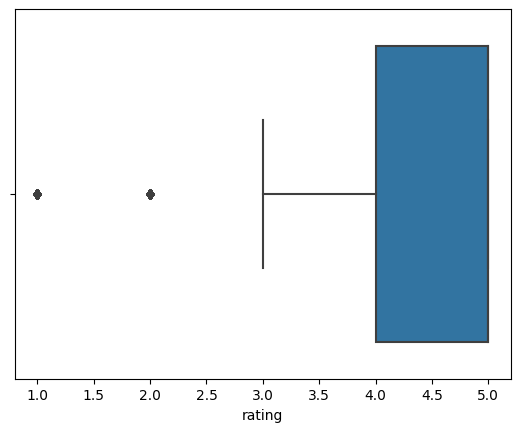

In [10]:
# Outliers in 'rating'
sns.boxplot(x='rating', data = reviews_final)
plt.show()

In [11]:
reviews_final.duplicated().sum()


0

# Stores

In [12]:
for row in session.execute("SELECT * FROM stores  LIMIT 5"):
  print(row)

{'gmap_id': '0x89c260cbcf2848c7:0x9b12a43601b1da0d', 'name': 'Chandrabali Home Improvement', 'address': 'Chandrabali Home Improvement, 133-20 95th Ave, Queens, NY 11419', 'category': SortedSet(['General contractor']), 'description': None, 'hours': "[['Monday', '7AM–5PM'], ['Tuesday', '7AM–5PM'], ['Wednesday', '7AM–5PM'], ['Thursday', '7AM–5PM'], ['Friday', '7AM–5PM'], ['Saturday', '8AM–1PM'], ['Sunday', 'Closed']]", 'latitude': 40.695640563964844, 'longitude': -73.81490325927734, 'misc': 'None', 'price': 'None', 'url': 'https://www.google.com/maps/place//data=!4m2!3m1!1s0x89c260cbcf2848c7:0x9b12a43601b1da0d?authuser=-1&hl=en&gl=us'}
{'gmap_id': '0x88f67d6459172897:0xb6897aae90060770', 'name': 'Morgan County Detention Center', 'address': 'Morgan County Detention Center, 1380 Monticello Rd, Madison, GA 30650', 'category': SortedSet(['Government office']), 'description': None, 'hours': "[['Wednesday', 'Open 24 hours'], ['Thursday', 'Open 24 hours'], ['Friday', 'Open 24 hours'], ['Saturday

In [64]:
categories_searched = ['Restaurant',
                       'restaurant',
                       'Bar',
                       'bar',
                       'Deli',
                       'Grocery',
                       'Coffee',
                       'Bakery',
                       'Sandwich']

dictionary = {'gmap_id':[],
              'name': [],
              'address': [],
              'latitude': [],
              'longitude': [],
              'category':[],
              'misc':[]}


for category_searched in categories_searched:
  # Construct the query
  query = f"""
        SELECT gmap_id,name,address,latitude,longitude,category, misc
        FROM stores
        WHERE category CONTAINS '{category_searched}'
        """
  statement = SimpleStatement(query, fetch_size = 3000)

  answer = session.execute(statement, timeout=None)

  for row in answer:
    dictionary['gmap_id'].append(row['gmap_id'])
    dictionary['name'].append(row['name'])
    dictionary['address'].append(row['address'])
    dictionary['latitude'].append(row['latitude'])
    dictionary['longitude'].append(row['longitude'])
    dictionary['category'].append(row['category'])
    dictionary['misc'].append(row['misc'])

In [14]:
# Create a DataFrame from the dictionary
df_stores = pd.DataFrame(dictionary)

df_stores.head()

,gmap_id,name,address,latitude,longitude,category,misc
0,0x87f38b6db3bf5557:0xb793ff26fbedb7fe,Shell,"Shell, 1510 Giant Dr, Blue Earth, MN 56013",43.657063,-94.097725,"(ATM, Car wash, Convenience store, Gas station...",{'Accessibility': ['Wheelchair accessible entr...
1,0x80c8bf86a8b9a3f1:0xacfe57cd1919e249,Ember's Grill + Spirits,"Ember's Grill + Spirits, 740 S Rampart Blvd, L...",36.163380,-115.289413,"(Bar, Restaurant)","{'Service options': ['Delivery'], 'Highlights'..."
2,0x808506614c768671:0xde51b62058db3bce,La Toque,"La Toque, 1314 McKinstry St, Napa, CA 94559",38.304173,-122.283989,"(French restaurant, Restaurant)","{'Service options': ['Outdoor seating', 'Dine-..."
3,0x8842ecec5931b86b:0x703640198411596d,Godfather's Pizza,"Godfather's Pizza, 233 Lexington Rd, Lancaster...",37.625710,-84.580132,"(Buffet restaurant, Delivery Restaurant, Itali...","{'Service options': ['Delivery'], 'Popular for..."
4,0x87e030ec559cac7f:0x8f04ab05959695e6,Subway,"Subway, 330 N 1st St, Cuba, IL 61427",40.496239,-90.198875,"(Caterer, Fast food restaurant, Restaurant, Sa...","{'Service options': ['Curbside pickup', 'Takeo..."


In [15]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157444 entries, 0 to 157443
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gmap_id    157444 non-null  object 
 1   name       157444 non-null  object 
 2   address    156787 non-null  object 
 3   latitude   157444 non-null  float64
 4   longitude  157444 non-null  float64
 5   category   157444 non-null  object 
 6   misc       157444 non-null  object 
dtypes: float64(2), object(5)
memory usage: 8.4+ MB


In [16]:
# Get the gmaps_ids of all unique shops in the reviews
gmap = reviews_final['gmap_id'].unique()
gmap

array(['0x80c335e5afce634b:0xd412bd31f33038cd',
       '0x89d1ab10d5e58599:0xbde28cea3afc74bf',
       '0x89c245fe6a9044cb:0xe9d98b1b3c1045a7', ...,
       '0x8665a74868d7a299:0xe056e26ec83c1a8',
       '0x89c25b9c0ffedda5:0xce77cc8bfde6a777',
       '0x86409bc3c2f1aff7:0x467fafde078ae87'], dtype=object)

In [17]:
# Filter the DataFrame
df_stores =  df_stores[df_stores['gmap_id'].isin(gmap)]

In [ ]:
df_stores.ifo()

In [18]:
gmap_s = df_stores['gmap_id'].unique()
gmap_s

array(['0x80c2c65af79ca789:0xa585cfe5d1430d04',
       '0x8085870fc40fa211:0x5ed309bfdc595759',
       '0x865c882f3cb0c9ab:0x47e61f2678fde77b', ...,
       '0x80ea695a4cc7e337:0x59115571d2177d64',
       '0x88e7790ad915b3bf:0xe29ffb688b004513',
       '0x89c25a263dab771f:0xe92ae29003b3656d'], dtype=object)

In [19]:
# Filter the DataFrame
reviews_final =  reviews_final[reviews_final['gmap_id'].isin(gmap_s)]

In [66]:
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098010 entries, 1043 to 12007124
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   gmap_id  1098010 non-null  object        
 1   state    1098010 non-null  object        
 2   user_id  1098010 non-null  float64       
 3   name     1098010 non-null  object        
 4   time     1098010 non-null  datetime64[ns]
 5   rating   1098010 non-null  int64         
 6   text     1098010 non-null  object        
 7   resp     1098010 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 75.4+ MB


# Tablas:

## Tabla 'Estados'

In [20]:
estados

array(['California', 'New York', 'Florida', 'Texas', 'Nevada'],
      dtype=object)

In [21]:
df_estados = pd.DataFrame({'State': estados})
df_estados['State_id'] = range(1, len(estados) + 1)

In [22]:
df_estados

,State,State_id
0,California,1
1,New York,2
2,Florida,3
3,Texas,4
4,Nevada,5


## Tabla 'Cliente'

In [23]:
df_clientes = reviews_final[['user_id', 'name']]
df_clientes = df_clientes.rename(columns={'user_id':'Client_id'})

In [24]:
df_clientes.head(2)

,Client_id,name
1043,1.161448e+20,Hao Yan
1044,1.150367e+20,Chris Lantzy


## Tabla 'Review'

In [25]:
df_review = reviews_final[['user_id', 'gmap_id', 'time', 'rating', 'text']]

df_review = df_review.rename(columns={'time':'date'})
df_review = df_review.rename(columns={'user_id':'Client_id'})

df_review['Review_id'] = range(1, len(df_review) + 1)

In [26]:
df_review.head(2)

,Client_id,gmap_id,date,rating,text,Review_id
1043,1.161448e+20,0x80c2c65af79ca789:0xa585cfe5d1430d04,2015-11-19 22:34:56.800,4,"$8.50 for the basic Phat Thai, a bit pricey bu...",1
1044,1.150367e+20,0x80c2c65af79ca789:0xa585cfe5d1430d04,2015-02-26 04:23:22.510,4,Fun little take out joint with shared tables o...,2


Data Incremental (Ejemplo):

*Contador para el siguiente ID
next_id = max(df['IDUsuario']) + 1

*Nuevos datos incrementales
new_data = [{'Nombre':'Laura', 'Edad':33}]
new_df = pd.DataFrame(new_data)

*Asignar nuevo ID incremental
new_df['IDUsuario'] = range(next_id, next_id+len(new_df))

*Actualizar contador
next_id = max(new_df['IDUsuario']) + 1

*Unir con datos existentes
df = pd.concat([df, new_df]).reset_index(drop=True)

## Tabla 'Comentarios'

In [27]:
df_review_2 = df_review.rename(columns={'Client_id':'user_id'})
df_review_2 = df_review_2.rename(columns={'date':'time'})

df_review_2 = df_review_2[['user_id', 'time', 'Review_id']]

reviews_final_2 = reviews_final.dropna(subset=['resp'])
reviews_final_2 = reviews_final_2[reviews_final_2['resp'] != 'None']

reviews_final_2 = reviews_final_2[['user_id', 'resp', 'time']]
merged = reviews_final_2.merge(df_review_2, on=['user_id', 'time'], how='inner')

In [28]:
merged.head(1)

,user_id,resp,time,Review_id
0,1.141283e+20,"{'time': 1538590106298, 'text': ""Thank you! We...",2018-10-03 17:53:35.306,108


In [29]:
df_comentarios = merged[['Review_id','resp']]
df_comentarios['Comment_id'] = range(1, len(df_comentarios) + 1)

In [30]:
df_comentarios.head(5)

,Review_id,resp,Comment_id
0,108,"{'time': 1538590106298, 'text': ""Thank you! We...",1
1,132,"{'time': 1589590849689, 'text': 'Thank you Ben!'}",2
2,151,"{'time': 1574994280516, 'text': 'Thank you! Ha...",3
3,166,"{'time': 1548206763547, 'text': 'Thank you for...",4
4,189,"{'time': 1583844206025, 'text': 'Glad you enjo...",5


In [31]:
import ast
# Convertimos la cadena en una lista de diccionarios
df_comentarios['resp'] = df_comentarios['resp'].apply(ast.literal_eval)

In [32]:
df_comentarios['time'] = df_comentarios['resp'].apply(lambda x: x['time'])

In [33]:
df_comentarios['text'] = df_comentarios['resp'].apply(lambda x: x['text'])

In [34]:
df_comentarios = df_comentarios.drop('resp', axis=1)

In [35]:
# Time to date
df_comentarios['time'] = pd.to_datetime(df_comentarios['time'], unit='ms')
df_comentarios = df_comentarios.rename(columns={'time':'date'})

In [36]:
df_comentarios.head(5)

,Review_id,Comment_id,date,text
0,108,1,2018-10-03 18:08:26.298,Thank you! We're glad you enjoyed it!
1,132,2,2020-05-16 01:00:49.689,Thank you Ben!
2,151,3,2019-11-29 02:24:40.516,Thank you! Happy Thanksgiving
3,166,4,2019-01-23 01:26:03.547,Thank you for your feedback regarding better p...
4,189,5,2020-03-10 12:43:26.025,Glad you enjoyed our savory hand pies! As for ...


In [37]:
df_comentarios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117991 entries, 0 to 117990
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Review_id   117991 non-null  int64         
 1   Comment_id  117991 non-null  int64         
 2   date        117991 non-null  datetime64[ns]
 3   text        117991 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.5+ MB


## Tabla 'Categoria'

In [38]:
# Create a new DataFrame with the unique categories
df_category = pd.DataFrame({'category': df_stores['category'].apply(list).explode().unique()})

df_category.head()

,category
0,Restaurant
1,Thai restaurant
2,ATM
3,Alternative fuel station
4,Car wash


In [39]:
# Create a dictionary to map each unique category to its index
category_index_map = {category: index for index, category in enumerate(df_category['category'], start=1)}

# Create a new column 'category_id' in the original DataFrame
df_stores['category_ids'] = df_stores['category'].apply(lambda x: [category_index_map[category] for category in x])

df_stores.head(1)

,gmap_id,name,address,latitude,longitude,category,misc,category_ids
14,0x80c2c65af79ca789:0xa585cfe5d1430d04,Pok Pok Phat Thai- Los Angeles,"Pok Pok Phat Thai- Los Angeles, 727 N Broadway...",34.061512,-118.239738,"(Restaurant, Thai restaurant)","{'Service options': ['Outdoor seating', 'Deliv...","[1, 2]"


In [40]:
df_categoria = df_category
df_categoria['category_id'] = range(1, len(df_categoria) + 1)

In [41]:
df_categoria.head(5)

,category,category_id
0,Restaurant,1
1,Thai restaurant,2
2,ATM,3
3,Alternative fuel station,4
4,Car wash,5


## Tabla 'Local'

In [42]:
reviews_final.head(1)

,gmap_id,state,user_id,name,time,rating,text,resp
1043,0x80c2c65af79ca789:0xa585cfe5d1430d04,California,1.161448e+20,Hao Yan,2015-11-19 22:34:56.800,4,"$8.50 for the basic Phat Thai, a bit pricey bu...",None


In [43]:
df_stores.head(1)

,gmap_id,name,address,latitude,longitude,category,misc,category_ids
14,0x80c2c65af79ca789:0xa585cfe5d1430d04,Pok Pok Phat Thai- Los Angeles,"Pok Pok Phat Thai- Los Angeles, 727 N Broadway...",34.061512,-118.239738,"(Restaurant, Thai restaurant)","{'Service options': ['Outdoor seating', 'Deliv...","[1, 2]"


In [44]:
merged = reviews_final.merge(df_stores, on='gmap_id')
merged.head(1)

,gmap_id,state,user_id,name_x,time,rating,text,resp,name_y,address,latitude,longitude,category,misc,category_ids
0,0x80c2c65af79ca789:0xa585cfe5d1430d04,California,1.161448e+20,Hao Yan,2015-11-19 22:34:56.800,4,"$8.50 for the basic Phat Thai, a bit pricey bu...",None,Pok Pok Phat Thai- Los Angeles,"Pok Pok Phat Thai- Los Angeles, 727 N Broadway...",34.061512,-118.239738,"(Restaurant, Thai restaurant)","{'Service options': ['Outdoor seating', 'Deliv...","[1, 2]"


In [45]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250598 entries, 0 to 1250597
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   gmap_id       1250598 non-null  object        
 1   state         1250598 non-null  object        
 2   user_id       1250598 non-null  float64       
 3   name_x        1250598 non-null  object        
 4   time          1250598 non-null  datetime64[ns]
 5   rating        1250598 non-null  int64         
 6   text          1250598 non-null  object        
 7   resp          1250598 non-null  object        
 8   name_y        1250598 non-null  object        
 9   address       1250229 non-null  object        
 10  latitude      1250598 non-null  float64       
 11  longitude     1250598 non-null  float64       
 12  category      1250598 non-null  object        
 13  misc          1250598 non-null  object        
 14  category_ids  1250598 non-null  object        
dty

In [57]:
def check_delivery(x):
  service_options = x.get("misc")

  if service_options and "Delivery" in service_options:
    return "Y"
  else:
    return "N"

merged['Delivery'] = merged.apply(check_delivery, axis=1)

In [62]:
merged.head(1)

,gmap_id,state,user_id,name_x,time,rating,text,resp,name_y,address,latitude,longitude,category,misc,category_ids,Delivery
0,0x80c2c65af79ca789:0xa585cfe5d1430d04,California,1.161448e+20,Hao Yan,2015-11-19 22:34:56.800,4,"$8.50 for the basic Phat Thai, a bit pricey bu...",None,Pok Pok Phat Thai- Los Angeles,"Pok Pok Phat Thai- Los Angeles, 727 N Broadway...",34.061512,-118.239738,"(Restaurant, Thai restaurant)","{'Service options': ['Outdoor seating', 'Deliv...","[1, 2]",Y


In [60]:
df_local = merged[['gmap_id', 'name_y', 'address', 'latitude', 'longitude', 'state', 'Delivery', 'category_ids']]
df_local = df_local.rename(columns={'name_y':'name'})

In [61]:
df_local.head(1)

,gmap_id,name,address,latitude,longitude,state,Delivery,category_ids
0,0x80c2c65af79ca789:0xa585cfe5d1430d04,Pok Pok Phat Thai- Los Angeles,"Pok Pok Phat Thai- Los Angeles, 727 N Broadway...",34.061512,-118.239738,California,Y,"[1, 2]"
